<a href="https://colab.research.google.com/github/Suryaprabha19/Sales_Prediction/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

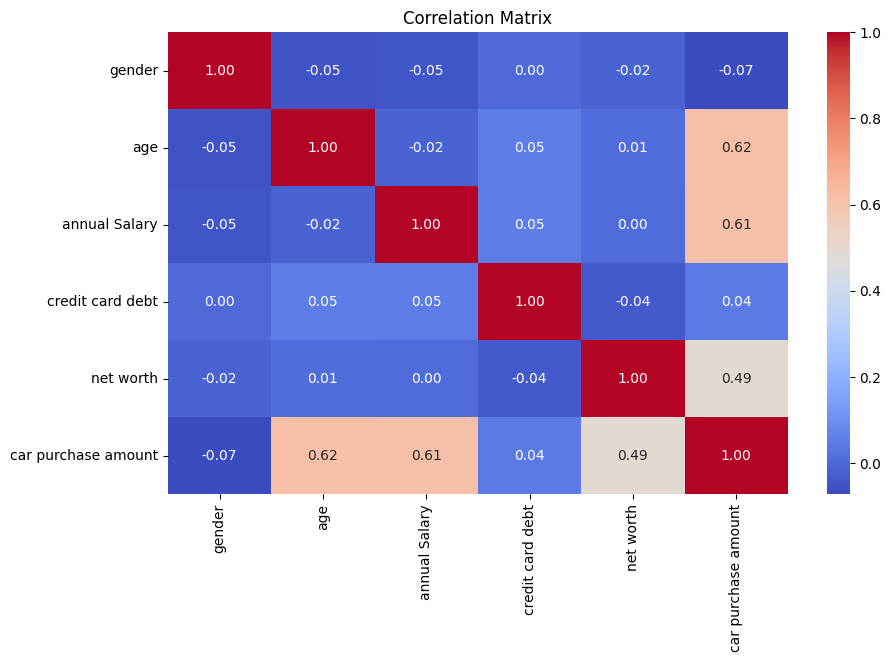

Mean Absolute Error: 0.0001218910108661069
Mean Squared Error: 2.3350110303041726e-08
R² Score: 0.9999999725650918


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/car_purchasing.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Drop irrelevant columns
df_cleaned = df.drop(columns=["customer name", "customer e-mail", "country"])

# Detect outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

df_filtered = remove_outliers_iqr(df_cleaned, ["age", "annual Salary", "credit card debt", "net worth", "car purchase amount"])

# Standardize numerical columns
scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[["age", "annual Salary", "credit card debt", "net worth", "car purchase amount"]] = scaler.fit_transform(
    df_filtered[["age", "annual Salary", "credit card debt", "net worth", "car purchase amount"]]
)

# Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Selecting relevant features and target variable
X = df_scaled[["age", "annual Salary", "net worth"]]
y = df_scaled["car purchase amount"]

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
